## ਕਦੂ ਦੀ ਕੀਮਤ ਲਈ ਰੇਖੀ ਅਤੇ ਬਹੁਪਦਾਰ ਰਿਗ੍ਰੈਸ਼ਨ - ਪਾਠ 3

ਲੋੜੀਂਦੇ ਲਾਇਬ੍ਰੇਰੀਆਂ ਅਤੇ ਡਾਟਾਸੈਟ ਲੋਡ ਕਰੋ। ਡਾਟਾ ਨੂੰ ਇੱਕ ਡਾਟਾਫਰੇਮ ਵਿੱਚ ਬਦਲੋ ਜੋ ਡਾਟਾ ਦਾ ਇੱਕ ਹਿੱਸਾ ਸ਼ਾਮਲ ਕਰਦਾ ਹੈ:

- ਸਿਰਫ ਉਹ ਕਦੂ ਪ੍ਰਾਪਤ ਕਰੋ ਜੋ ਬੁਸ਼ਲ ਦੁਆਰਾ ਕੀਮਤ ਕੀਤੇ ਗਏ ਹਨ
- ਮਿਤੀ ਨੂੰ ਇੱਕ ਮਹੀਨੇ ਵਿੱਚ ਬਦਲੋ
- ਕੀਮਤ ਦੀ ਗਣਨਾ ਉੱਚ ਅਤੇ ਘੱਟ ਕੀਮਤਾਂ ਦੇ ਔਸਤ ਵਜੋਂ ਕਰੋ
- ਕੀਮਤ ਨੂੰ ਬੁਸ਼ਲ ਮਾਤਰਾ ਦੁਆਰਾ ਕੀਮਤ ਦਰਸਾਉਣ ਲਈ ਬਦਲੋ


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

ਇੱਕ ਸਕੈਟਰਪਲਾਟ ਸਾਨੂੰ ਯਾਦ ਦਿਵਾਉਂਦਾ ਹੈ ਕਿ ਸਾਡੇ ਕੋਲ ਸਿਰਫ਼ ਅਗਸਤ ਤੋਂ ਦਸੰਬਰ ਤੱਕ ਦੇ ਮਹੀਨੇ ਦੇ ਡਾਟਾ ਹੈ। ਸਾਨੂੰ ਸੰਭਵਤ: ਨਤੀਜੇ ਲੀਨੀਅਰ ਢੰਗ ਨਾਲ ਕੱਢਣ ਲਈ ਹੋਰ ਡਾਟਾ ਦੀ ਲੋੜ ਹੈ।


<AxesSubplot:xlabel='Month', ylabel='Price'>

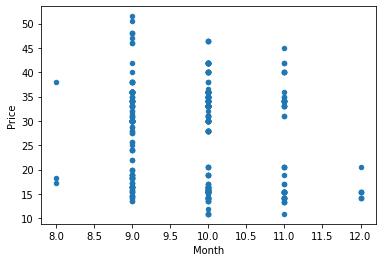

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

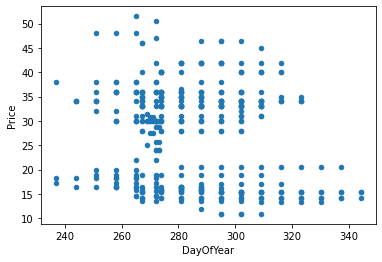

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


ਲੱਗਦਾ ਹੈ ਕਿ ਸੰਬੰਧਤਾ ਕਾਫ਼ੀ ਛੋਟੀ ਹੈ, ਪਰ ਕੋਈ ਹੋਰ ਮਹੱਤਵਪੂਰਨ ਸੰਬੰਧ ਹੈ - ਕਿਉਂਕਿ ਉੱਪਰ ਦਿੱਤੇ ਗ੍ਰਾਫ ਵਿੱਚ ਕੀਮਤਾਂ ਦੇ ਬਿੰਦੂਆਂ ਵਿੱਚ ਕਈ ਵੱਖਰੇ ਕਲੱਸਟਰ ਦਿਖਾਈ ਦੇ ਰਹੇ ਹਨ। ਆਓ ਇੱਕ ਗ੍ਰਾਫ ਬਣਾਈਏ ਜੋ ਵੱਖ-ਵੱਖ ਕੱਦੂ ਦੀਆਂ ਕਿਸਮਾਂ ਦਿਖਾਵੇਗਾ:


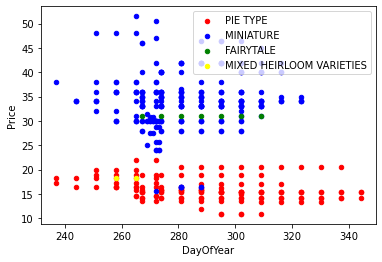

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

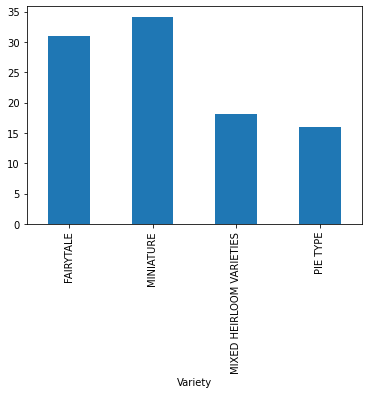

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

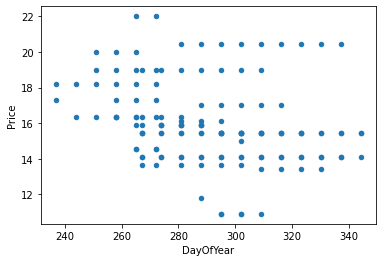

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### ਲੀਨੀਅਰ ਰਿਗ੍ਰੈਸ਼ਨ

ਅਸੀਂ ਲੀਨੀਅਰ ਰਿਗ੍ਰੈਸ਼ਨ ਮਾਡਲ ਨੂੰ ਟ੍ਰੇਨ ਕਰਨ ਲਈ Scikit Learn ਦੀ ਵਰਤੋਂ ਕਰਾਂਗੇ:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


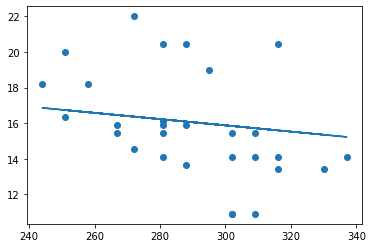

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

ਰੇਖਾ ਦਾ ਢਲਾਨ ਰੇਖੀ ਰਿਗ੍ਰੈਸ਼ਨ ਗੁਣਾਂਕਾਂ ਤੋਂ ਨਿਰਧਾਰਤ ਕੀਤਾ ਜਾ ਸਕਦਾ ਹੈ:


In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### ਪੋਲੀਨੋਮਿਅਲ ਰਿਗ੍ਰੈਸ਼ਨ

ਕਈ ਵਾਰ ਫੀਚਰਾਂ ਅਤੇ ਨਤੀਜਿਆਂ ਦੇ ਵਿਚਕਾਰ ਸੰਬੰਧ ਮੂਲ ਰੂਪ ਵਿੱਚ ਗੈਰ-ਰੇਖੀ ਹੁੰਦਾ ਹੈ। ਉਦਾਹਰਣ ਲਈ, ਕਦੂ ਦੀਆਂ ਕੀਮਤਾਂ ਸਰਦੀ ਦੇ ਮੌਸਮ ਵਿੱਚ (ਮਹੀਨੇ=1,2) ਉੱਚੀਆਂ ਹੋ ਸਕਦੀਆਂ ਹਨ, ਫਿਰ ਗਰਮੀ ਦੇ ਮੌਸਮ ਵਿੱਚ ਘਟ ਜਾਂਦੀਆਂ ਹਨ (ਮਹੀਨੇ=5-7), ਅਤੇ ਫਿਰ ਵਧ ਜਾਂਦੀਆਂ ਹਨ। ਲੀਨੀਅਰ ਰਿਗ੍ਰੈਸ਼ਨ ਇਸ ਸੰਬੰਧ ਨੂੰ ਸਹੀ ਤਰੀਕੇ ਨਾਲ ਨਹੀਂ ਪਕੜ ਸਕਦਾ।

ਇਸ ਸਥਿਤੀ ਵਿੱਚ, ਅਸੀਂ ਵਾਧੂ ਫੀਚਰਾਂ ਸ਼ਾਮਲ ਕਰਨ ਬਾਰੇ ਸੋਚ ਸਕਦੇ ਹਾਂ। ਇੱਕ ਸਧਾਰਨ ਤਰੀਕਾ ਇਹ ਹੈ ਕਿ ਇਨਪੁਟ ਫੀਚਰਾਂ ਤੋਂ ਪੋਲੀਨੋਮਿਅਲ ਵਰਤ ਕੇ ਨਵੇਂ ਫੀਚਰ ਬਣਾਏ ਜਾਣ, ਜਿਸ ਨਾਲ **ਪੋਲੀਨੋਮਿਅਲ ਰਿਗ੍ਰੈਸ਼ਨ** ਹੁੰਦਾ ਹੈ। Scikit Learn ਵਿੱਚ, ਅਸੀਂ ਪਾਈਪਲਾਈਨ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਪੋਲੀਨੋਮਿਅਲ ਫੀਚਰਾਂ ਨੂੰ ਆਪਣੇ ਆਪ ਪ੍ਰੀ-ਕੰਪਿਊਟ ਕਰ ਸਕਦੇ ਹਾਂ:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


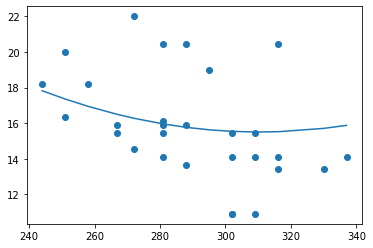

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### ਕਿਸਮਾਂ ਨੂੰ ਐਨਕੋਡ ਕਰਨਾ

ਇਕ ਆਦਰਸ਼ ਜਗਤ ਵਿੱਚ, ਅਸੀਂ ਇੱਕੋ ਮਾਡਲ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਵੱਖ-ਵੱਖ ਕੱਦੂ ਦੀਆਂ ਕਿਸਮਾਂ ਲਈ ਕੀਮਤਾਂ ਦੀ ਪੇਸ਼ਗੂਈ ਕਰਨਾ ਚਾਹੁੰਦੇ ਹਾਂ। ਕਿਸਮ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖਣ ਲਈ, ਸਾਨੂੰ ਪਹਿਲਾਂ ਇਸਨੂੰ ਸੰਖਿਆਤਮਕ ਰੂਪ ਵਿੱਚ ਬਦਲਣਾ ਪਵੇਗਾ, ਜਾਂ **ਐਨਕੋਡ** ਕਰਨਾ ਪਵੇਗਾ। ਇਸਨੂੰ ਕਰਨ ਦੇ ਕਈ ਤਰੀਕੇ ਹਨ:

* ਸਧਾਰਨ ਸੰਖਿਆਤਮਕ ਐਨਕੋਡਿੰਗ, ਜੋ ਵੱਖ-ਵੱਖ ਕਿਸਮਾਂ ਦੀ ਇੱਕ ਟੇਬਲ ਬਣਾਏਗੀ, ਅਤੇ ਫਿਰ ਉਸ ਟੇਬਲ ਵਿੱਚ ਕਿਸਮ ਦੇ ਨਾਮ ਨੂੰ ਇੱਕ ਇੰਡੈਕਸ ਨਾਲ ਬਦਲ ਦੇਵੇਗੀ। ਇਹ ਰੇਖੀ ਰਿਗ੍ਰੈਸ਼ਨ ਲਈ ਸਭ ਤੋਂ ਵਧੀਆ ਵਿਚਾਰ ਨਹੀਂ ਹੈ, ਕਿਉਂਕਿ ਰੇਖੀ ਰਿਗ੍ਰੈਸ਼ਨ ਇੰਡੈਕਸ ਦੇ ਸੰਖਿਆਤਮਕ ਮੁੱਲ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖਦੀ ਹੈ, ਅਤੇ ਸੰਖਿਆਤਮਕ ਮੁੱਲ ਸੰਭਵ ਹੈ ਕਿ ਕੀਮਤ ਨਾਲ ਸੰਖਿਆਤਮਕ ਤੌਰ 'ਤੇ ਸਬੰਧਿਤ ਨਾ ਹੋਵੇ।
* ਵਨ-ਹਾਟ ਐਨਕੋਡਿੰਗ, ਜੋ `Variety` ਕਾਲਮ ਨੂੰ 4 ਵੱਖ-ਵੱਖ ਕਾਲਮਾਂ ਨਾਲ ਬਦਲ ਦੇਵੇਗੀ, ਹਰ ਕਿਸਮ ਲਈ ਇੱਕ, ਜੋ 1 ਦਰਸਾਏਗੀ ਜੇਕਰ ਸੰਬੰਧਿਤ ਪੰਕਤੀ ਦਿੱਤੀ ਕਿਸਮ ਦੀ ਹੋਵੇ, ਅਤੇ ਨਹੀਂ ਤਾਂ 0।

ਹੇਠਾਂ ਦਿੱਤਾ ਕੋਡ ਦਰਸਾਉਂਦਾ ਹੈ ਕਿ ਅਸੀਂ ਕਿਸਮ ਨੂੰ ਵਨ-ਹਾਟ ਐਨਕੋਡ ਕਿਵੇਂ ਕਰ ਸਕਦੇ ਹਾਂ:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### ਵੈਰਾਇਟੀ 'ਤੇ ਲੀਨੀਅਰ ਰਿਗ੍ਰੈਸ਼ਨ

ਅਸੀਂ ਹੁਣ ਉਪਰੋਕਤ ਕੋਡ ਨੂੰ ਹੀ ਵਰਤਾਂਗੇ, ਪਰ `DayOfYear` ਦੀ ਬਜਾਏ ਅਸੀਂ ਆਪਣੀ ਇੱਕ-ਹਾਟ-ਇਨਕੋਡ ਕੀਤੀ ਵੈਰਾਇਟੀ ਨੂੰ ਇਨਪੁਟ ਵਜੋਂ ਵਰਤਾਂਗੇ:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


ਅਸੀਂ ਹੋਰ ਵਿਸ਼ੇਸ਼ਤਾਵਾਂ ਨੂੰ ਵੀ ਇਸੇ ਤਰੀਕੇ ਨਾਲ ਵਰਤਣ ਦੀ ਕੋਸ਼ਿਸ਼ ਕਰ ਸਕਦੇ ਹਾਂ, ਅਤੇ ਉਨ੍ਹਾਂ ਨੂੰ ਸੰਖਿਆਤਮਕ ਵਿਸ਼ੇਸ਼ਤਾਵਾਂ ਜਿਵੇਂ ਕਿ `Month` ਜਾਂ `DayOfYear` ਨਾਲ ਜੋੜ ਸਕਦੇ ਹਾਂ:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### ਪੋਲੀਨੋਮਿਅਲ ਰਿਗ੍ਰੈਸ਼ਨ

ਪੋਲੀਨੋਮਿਅਲ ਰਿਗ੍ਰੈਸ਼ਨ ਨੂੰ ਇੱਕ-ਹਾਟ-ਇਨਕੋਡ ਕੀਤੀਆਂ ਸ਼੍ਰੇਣੀਬੱਧ ਵਿਸ਼ੇਸ਼ਤਾਵਾਂ ਨਾਲ ਵੀ ਵਰਤਿਆ ਜਾ ਸਕਦਾ ਹੈ। ਪੋਲੀਨੋਮਿਅਲ ਰਿਗ੍ਰੈਸ਼ਨ ਨੂੰ ਟ੍ਰੇਨ ਕਰਨ ਲਈ ਕੋਡ ਮੂਲ ਰੂਪ ਵਿੱਚ ਉਹੀ ਹੋਵੇਗਾ ਜਿਵੇਂ ਅਸੀਂ ਉੱਪਰ ਵੇਖਿਆ ਹੈ।


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**ਅਸਵੀਕਾਰਨਾ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਹਾਲਾਂਕਿ ਅਸੀਂ ਸਹੀਅਤ ਲਈ ਯਤਨਸ਼ੀਲ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁਣਸ਼ੀਲਤਾਵਾਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਇਸ ਦਸਤਾਵੇਜ਼ ਦਾ ਮੂਲ ਰੂਪ ਇਸਦੀ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਅਧਿਕਾਰਤ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੀ ਵਰਤੋਂ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।
